# Data Wrangling
## import work

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import *

In [97]:
df = pd.DataFrame(pd.read_csv('hour1.csv'))

In [98]:
df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,7/3/2011,3,0,7,17,0,0,0,3,0.80,0.7424,0.49,0.8507,181,177,358
1,2,7/3/2011,3,0,7,18,0,0,0,3,0.80,0.7424,0.49,0.8507,74,107,181
2,3,8/27/2011,3,0,8,17,0,6,0,3,0.64,0.5758,0.89,0.8358,2,14,16
3,4,2/25/2011,1,0,2,15,0,5,1,1,0.46,0.4545,0.41,0.8060,5,50,55
4,5,2/24/2012,1,1,2,21,0,5,1,1,0.42,0.4242,0.35,0.8060,1,151,152


# Scrubbing


In [99]:
df.nunique()

instant       17379
dateday         731
season            4
year              2
month            12
hour             24
holiday           2
weekday           7
workingday        2
weather           4
temp             50
atemp            65
humidity         89
windspeed        30
casual          322
registered      776
count           869
dtype: int64

In [100]:
display(df.loc[[]])

df.columns

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


Index(['instant', 'dateday', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [101]:
df.isna().sum()

instant       0
dateday       0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [102]:
df.duplicated().sum()

0

In [218]:
df.nsmallest(10, "realatemp")

,instant,dateday,season,year,month,day,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,realtemp,realatemp
974,975,2011-01-22,Winter,0,1,22,1,No,6,No,2_Cloud,0.04,0.0000,0.41,0.3881,3,9,12,-6.12,-16.0000
1829,1830,2011-01-22,Winter,0,1,22,8,No,6,No,1_Clear,0.02,0.0000,0.44,0.3284,1,26,27,-7.06,-16.0000
2428,2429,2011-01-22,Winter,0,1,22,4,No,6,No,2_Cloud,0.02,0.0152,0.48,0.2985,0,3,3,-7.06,-14.9968
3252,3253,2011-01-22,Winter,0,1,22,7,No,6,No,1_Clear,0.02,0.0152,0.44,0.2836,0,8,8,-7.06,-14.9968
3767,3768,2012-01-04,Winter,1,1,4,2,No,3,Yes,1_Clear,0.02,0.0152,0.34,0.2836,0,1,1,-7.06,-14.9968
3768,3769,2012-01-04,Winter,1,1,4,3,No,3,Yes,1_Clear,0.02,0.0152,0.34,0.2836,0,1,1,-7.06,-14.9968
973,974,2011-01-21,Winter,0,1,21,22,No,5,Yes,1_Clear,0.06,0.0303,0.41,0.3881,1,33,34,-5.18,-14.0002
2816,2817,2012-01-04,Winter,1,1,4,1,No,3,Yes,1_Clear,0.04,0.0303,0.38,0.2985,0,3,3,-6.12,-14.0002
3251,3252,2011-01-22,Winter,0,1,22,3,No,6,No,2_Cloud,0.04,0.0303,0.41,0.2836,1,6,7,-6.12,-14.0002
4299,4300,2011-01-22,Winter,0,1,22,0,No,6,No,1_Clear,0.04,0.0303,0.45,0.2537,0,13,13,-6.12,-14.0002


# Renaming and revalueing


In [103]:
df.loc[df['holiday'] == 0, 'holiday'] = 'No'
df.loc[df['holiday'] == 1, 'holiday'] = 'Yes'

In [104]:
df.loc[df['workingday'] == 0, 'workingday'] = 'No'
df.loc[df['workingday'] == 1, 'workingday'] = 'Yes'

In [105]:
df.loc[df['season'] == 1, 'season'] = 'Winter'
df.loc[df['season'] == 2, 'season'] = 'Spring'
df.loc[df['season'] == 3, 'season'] = 'Summer'
df.loc[df['season'] == 4, 'season'] = 'Fall'

In [106]:
df.loc[df['weather'] == 1, 'weather'] = '1_Clear'
df.loc[df['weather'] == 2, 'weather'] = '2_Cloud'
df.loc[df['weather'] == 3, 'weather'] = '3_Light'
df.loc[df['weather'] == 4, 'weather'] = '4_Heavy'

In [107]:
df['dateday'] = pd.to_datetime(df['dateday'], format='%m/%d/%Y')
day = df.insert(loc=5, column='day', value=df['dateday'].dt.day)

### denormalizing data

In [108]:
# Calculate unnormalized values and add them as new columns for actual temp
min_temp = -8
max_temp = 39
df['realtemp'] = df['temp'] * (max_temp - min_temp) + min_temp

# Calculate unnormalized values and add them as new columns for feel temp
min_temp1 = -16
max_temp1 = 50
df['realatemp'] = df['atemp'] * (max_temp1 - min_temp1) + min_temp1

df.head()

,instant,dateday,season,year,month,day,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,realtemp,realatemp
0,1,2011-07-03,Summer,0,7,3,17,No,0,No,3_Light,0.80,0.7424,0.49,0.8507,181,177,358,29.60,32.9984
1,2,2011-07-03,Summer,0,7,3,18,No,0,No,3_Light,0.80,0.7424,0.49,0.8507,74,107,181,29.60,32.9984
2,3,2011-08-27,Summer,0,8,27,17,No,6,No,3_Light,0.64,0.5758,0.89,0.8358,2,14,16,22.08,22.0028
3,4,2011-02-25,Winter,0,2,25,15,No,5,Yes,1_Clear,0.46,0.4545,0.41,0.8060,5,50,55,13.62,13.9970
4,5,2012-02-24,Winter,1,2,24,21,No,5,Yes,1_Clear,0.42,0.4242,0.35,0.8060,1,151,152,11.74,11.9972


In [14]:
# Create separate data frames for year 0 and year 1
df_year0 = df[df['year'] == 0]
df_year1 = df[df['year'] == 1]

In [15]:
display(df[df['year'] == 0]['casual'].sum())
display(df_year0['casual'].sum())

247252

247252

In [16]:
# plt.figure(figsize=(12,8))

# corr = df.corr()

# x= df['realtemp']
# y= df['casual']

# sns.heatmap(corr, 
#             annot=True, 
#             cmap="RdBu", 
#             fmt= '.1f',
#             xticklabels= x, yticklabels= y,
#             linewidths= 0.5,
#             linecolor= 'white')
# plt.title('Bike rentals')

# plt.show()

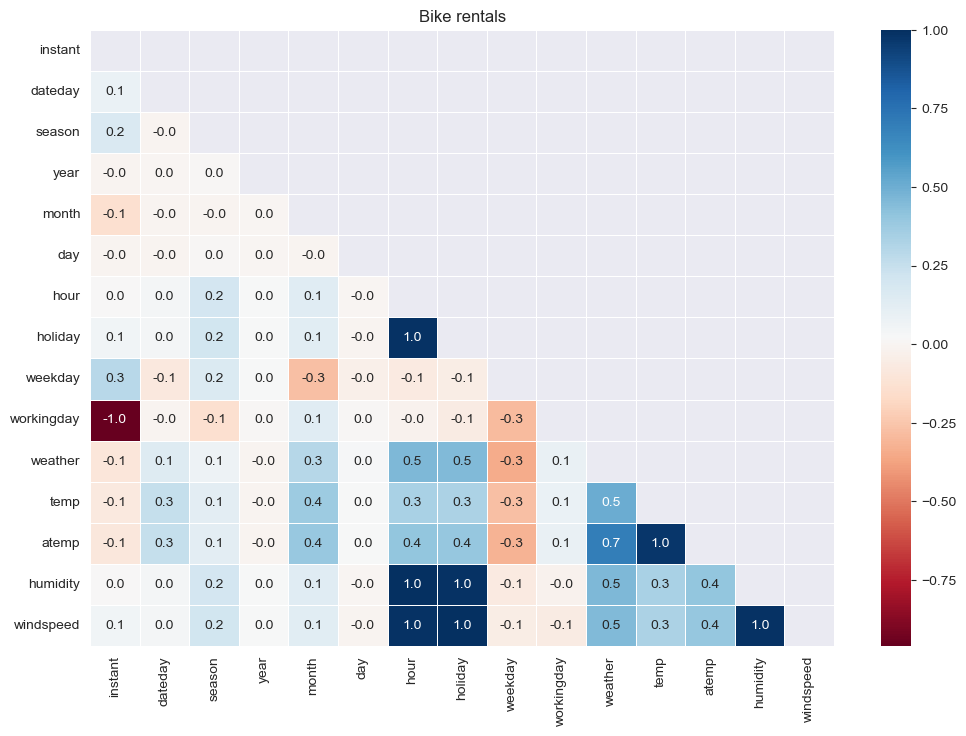

In [288]:
plt.figure(figsize=(12,8))


#giving the data 
corr = df.corr()

#giving the color
colormap = sns.color_palette("RdBu", 6)

#giving new list 
x = df.columns.drop(['count', 'realtemp', 'realatemp', 'registered', 'casual'])
y = df.columns.drop(['count', 'realtemp', 'realatemp', 'registered', 'casual'])

#creating the mask to remove the top triangle
mask = np.triu(corr)

#creating the chart
sns.heatmap(corr, 
            annot=True, 
            cmap="RdBu", 
            fmt= '.1f',
            xticklabels= x, yticklabels= y,
            mask=mask,
            linewidths= 0.5,
            linecolor= 'white')
plt.title('Bike rentals')

plt.show()

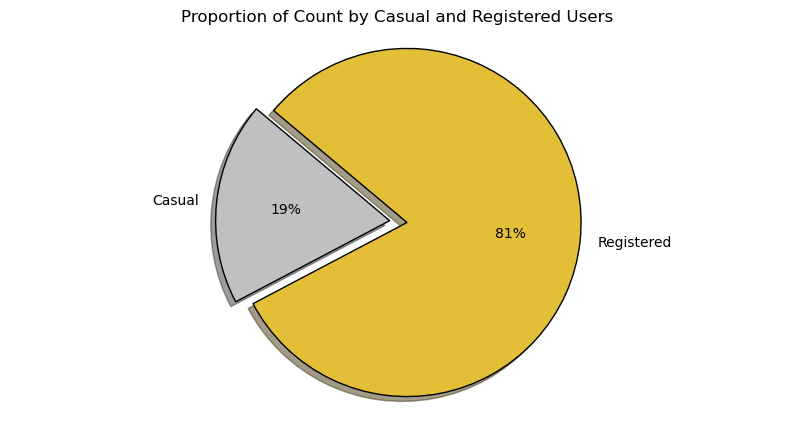

In [18]:
fig, axs = plt.subplots(figsize=(10, 5))

labels = ['Casual', 'Registered']
sizes = [df['casual'].sum(), df['registered'].sum()]
colors = ['silver', '#e2bf36']
explode = (0, 0.1) 

plt.pie(sizes, 
        # explode=explode, 
        labels=labels, 
        autopct='%1.0f%%',
        shadow=True, 
        colors=colors,
        explode=explode,
        startangle=140,
        wedgeprops={'edgecolor': 'black'})
plt.axis('equal')
plt.title('Proportion of Count by Casual and Registered Users')
plt.show()

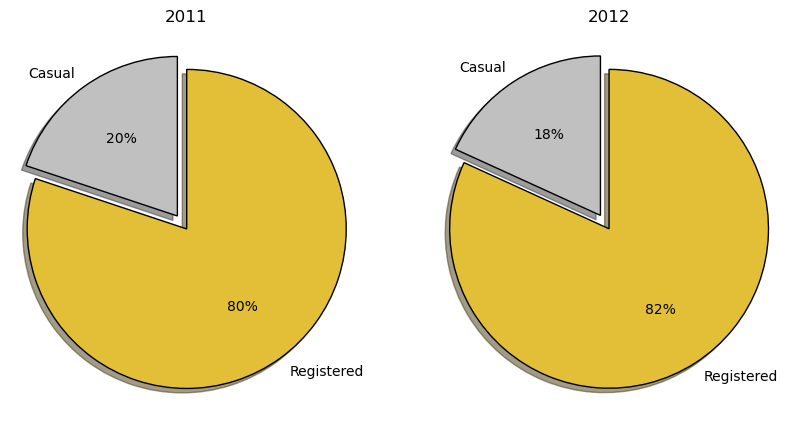

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for idx, c in enumerate(['red', 'blue']):
    labels = ['Casual', 'Registered']
    sizes = [df[df['year'] == idx]['casual'].sum(), df[df['year'] == idx]['registered'].sum()]
    colors = ['#C0C0C0', '#e2bf36']
    explode = (0.0, 0.1) 
    
    axs[idx].pie(sizes, 
            explode=explode, 
            labels=labels, 
            autopct='%1.0f%%',
            shadow=True, 
            colors=colors,
            startangle=90,
            wedgeprops={'edgecolor': 'black'})
    axs[idx].set_title(f'{2011 + idx}')
    axs[idx].axis('equal')

plt.show()

### comparing years

The column you selected: month


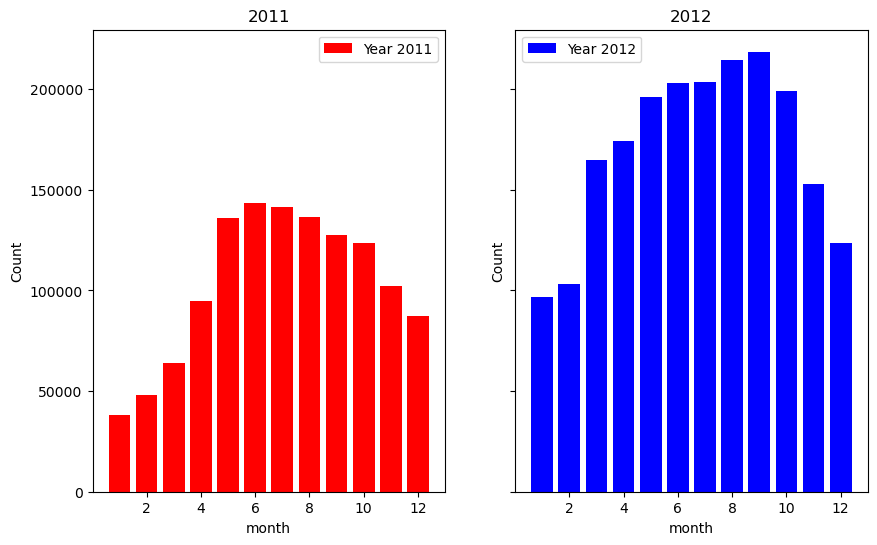

In [20]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 6))

#input
wanted_input = input('Select: day, year, month, hour, holiday, weekday, workingday, weather')
print(f'The column you selected: {wanted_input}')

for idx, c in enumerate(['red', 'blue']):
    x = []
    y = []

    for h in df[df['year'] == idx].groupby(wanted_input):
        x.append(h[0])
        y.append(h[1]['count'].sum())

    axs[idx].bar(x, y, color= c, label=f'Year {2011+idx}')
    axs[idx].set_title(2011 + idx)
    axs[idx].set_xlabel(wanted_input)
    axs[idx].set_ylabel('Count')
    axs[idx].legend()

plt.show()

In [22]:
df[df['year'] == idx]['casual'].sum()

247252

### Bar plot with 2 bars 

The column you selected: weekday


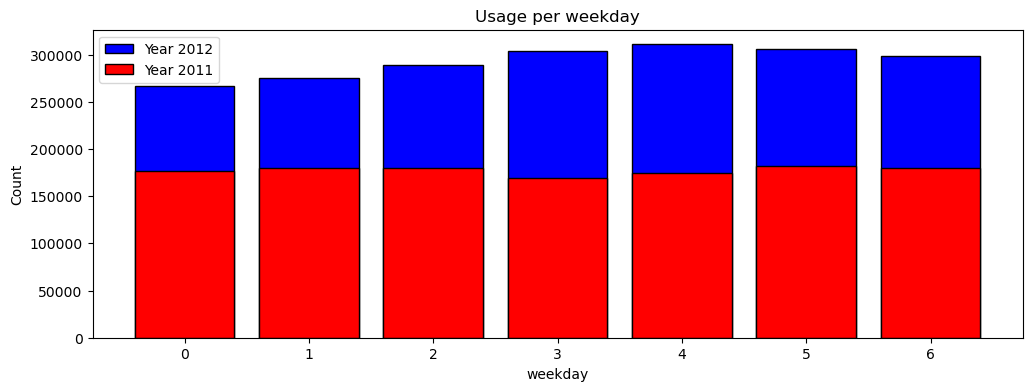

In [275]:
fig, axs = plt.subplots(1, sharey=True, figsize=(12, 4))

#input
wanted_input = input('Select: day, year, month, hour, holiday, weekday, workingday, weather')
print(f'The column you selected: {wanted_input}')

for idx, c in reversed(list(enumerate(['red', 'blue']))):
    x = []
    y = []

    for h in df[df['year'] == idx].groupby(wanted_input):
        x.append(h[0])
        y.append(h[1]['count'].sum())

    axs.bar(x, y, color= c, label=f'Year {2011+idx}', edgecolor='black' )
    axs.set_title(f'Usage per {wanted_input}')
    axs.set_xlabel(wanted_input)
    axs.set_ylabel('Count')
    axs.legend()

plt.show()

### Very basic Bar plot

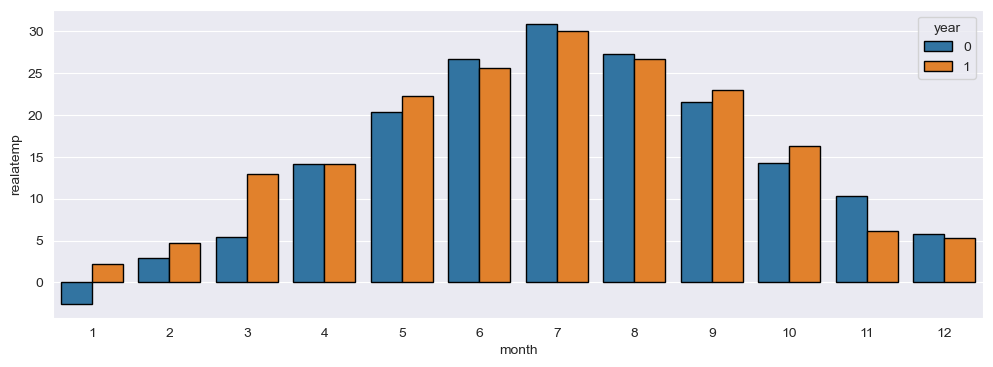

In [285]:
fig, axs = plt.subplots(figsize=(12, 4))

sns.barplot(x = 'month',
            y = 'realatemp',
            hue = 'year',
            ci = 0,
            data = df,
            edgecolor='black')
sns.set_style('dark')
plt.show()

In [24]:
df.casual.head()

0    181
1     74
2      2
3      5
4      1
Name: casual, dtype: int64

### line graf with two columns

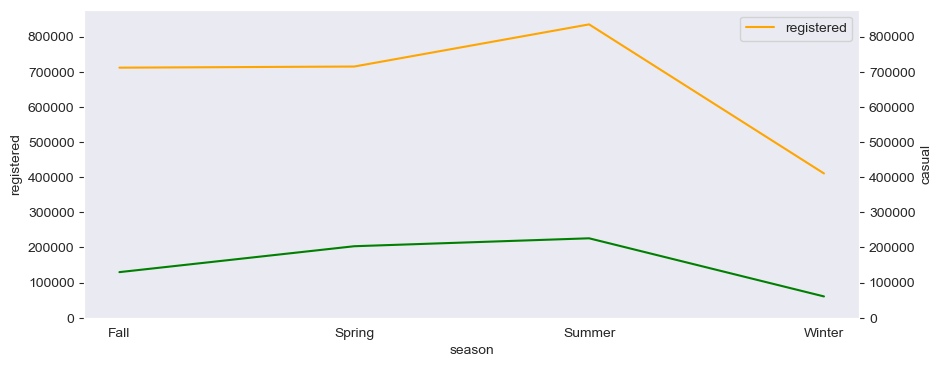

In [286]:
def reg_cas():
    fig = plt.figure(figsize=(10, 4)) # Create matplotlib figure
    x_input = input()

    ax = fig.add_subplot(111) # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

    df.groupby(x_input).registered.sum().plot(color='orange', ax=ax, label= 'registered')
    df.groupby(x_input).casual.sum().plot(color='green', ax=ax2, label= 'casual')

    ax.set_ylabel('registered')
    ax2.set_ylabel('casual')
    ax.legend(['registered' , 'casual'])
    
    # Set y-axis limits for both axes to the same range
    y_min = 0
    y_max = max(df.groupby(x_input).registered.sum().max(), df.groupby(x_input).casual.sum().max())*1.05
    ax.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)
    sns.set_style('darkgrid')

    plt.show()

reg_cas()

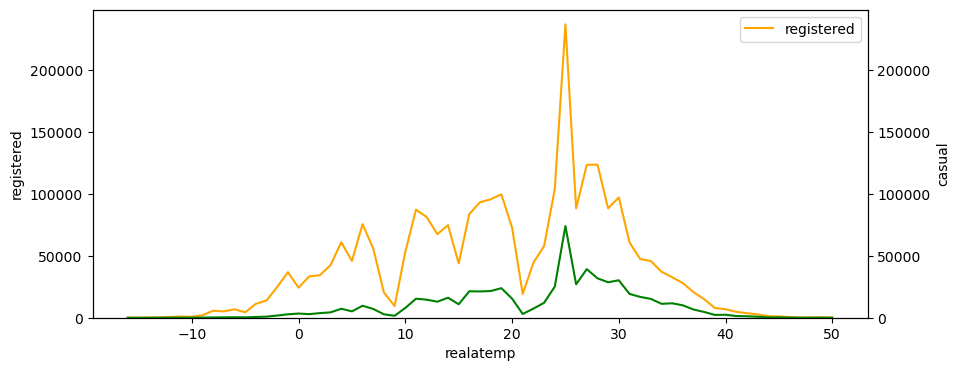

In [264]:
reg_cas()

In [196]:
df.head(0)

,instant,dateday,season,year,month,day,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,realtemp,realatemp


### Simple shared Bar chart

(array([2974., 1881., 1570.,  996.,  495.,  268.,  209.,  181.,  134.,
          26.]),
 array([  0. ,  88.6, 177.2, 265.8, 354.4, 443. , 531.6, 620.2, 708.8,
        797.4, 886. ]),
 <BarContainer object of 10 artists>)

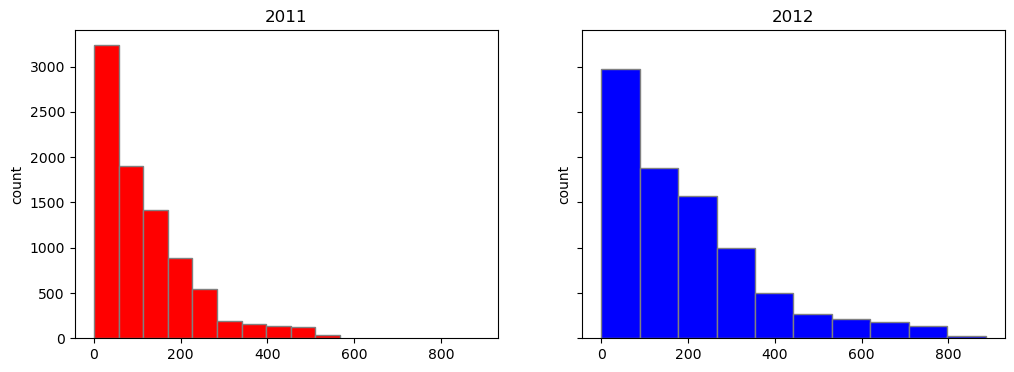

In [215]:
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 4))

axs[0].set_title('2011')
axs[0].set_ylabel('count')
axs[0].hist(df_year0['registered'], 
            color='red',
            edgecolor='grey')

axs[1].set_title('2012')
axs[1].set_ylabel('count')
axs[1].hist(df_year1['registered'], 
            color='blue',
            edgecolor='grey')

<AxesSubplot:xlabel='realatemp', ylabel='Percent'>

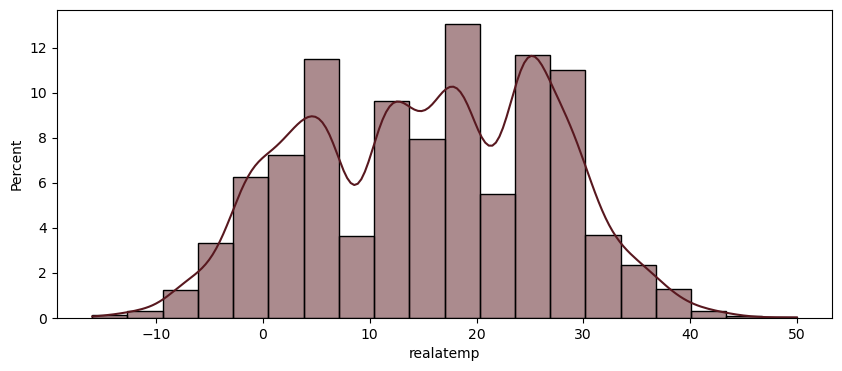

In [216]:
fig = plt.subplots( figsize = (10, 4))

sns.histplot(x = df['realatemp'],
            bins = 20,
            kde = True,
            cbar = True,
            stat = 'percent',
            color ="#58181F")

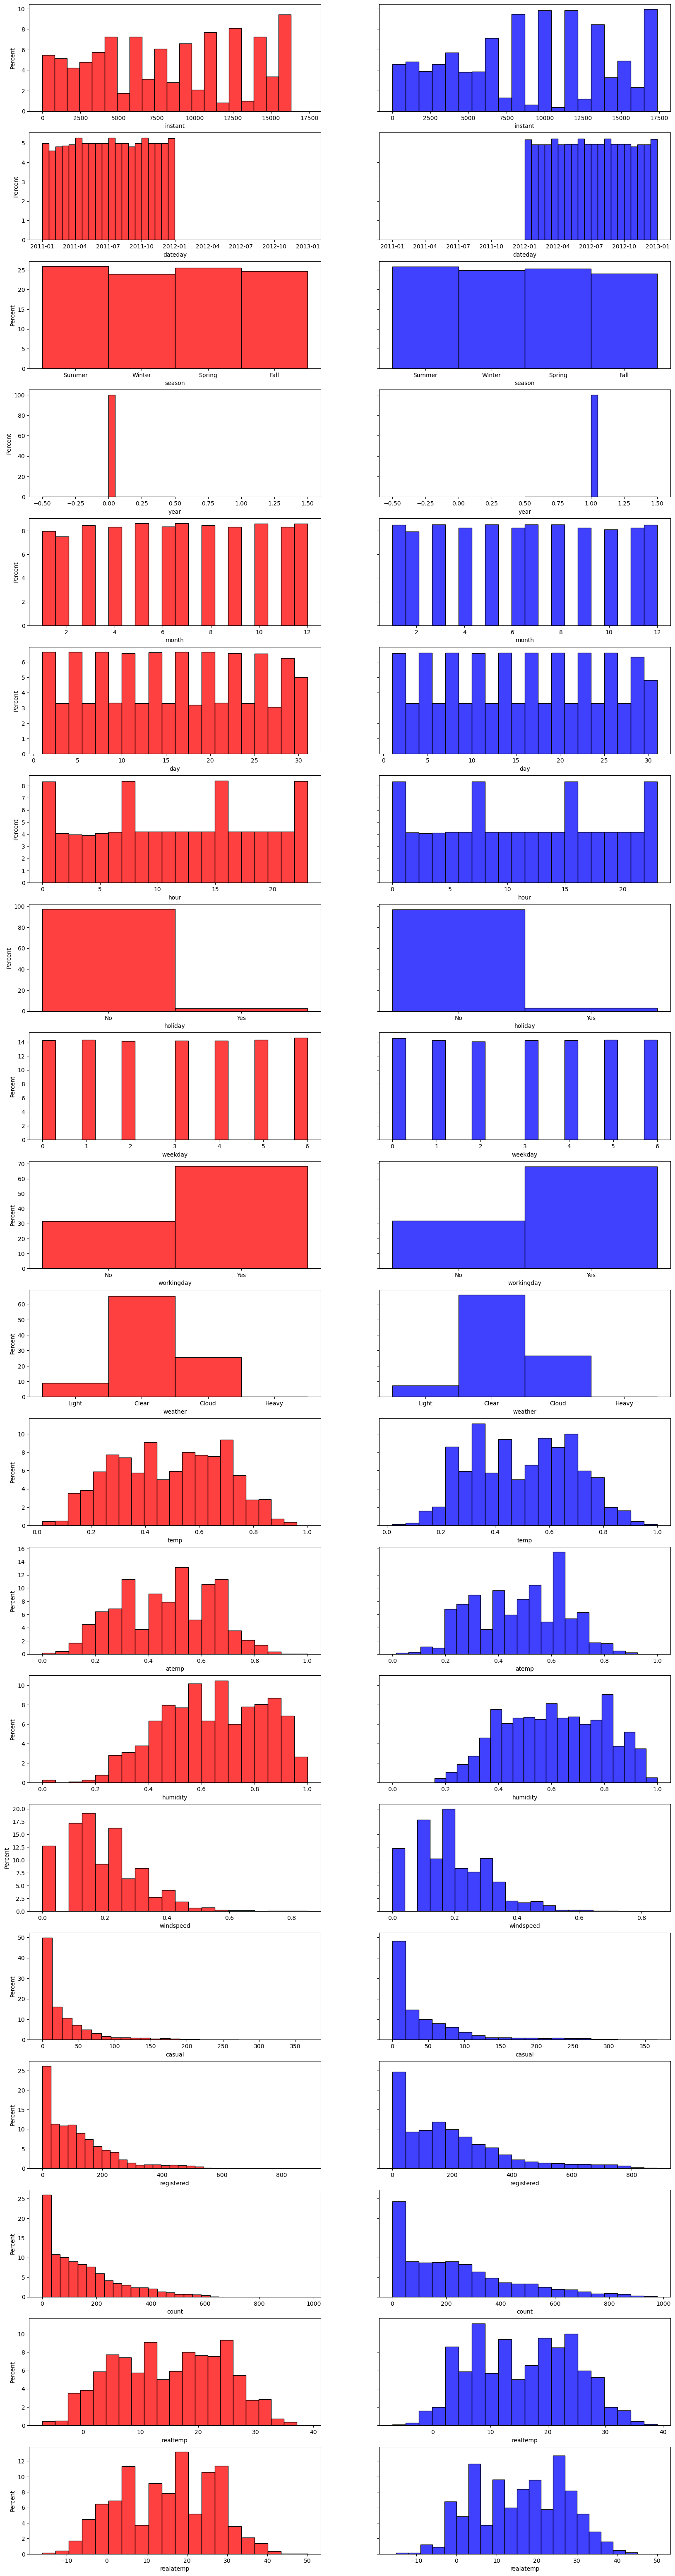

In [28]:
fields=list(df)


fig, axes = plt.subplots(len(fields), 2, sharex="row", sharey="row", tight_layout=False, figsize = (len(fields), 2*40))
h=0
for field in fields:
     sns.histplot(ax = axes[h][0], x = df_year0[field],
                    bins = 20,
                    kde = False,
                    cbar = False,
                    stat = 'percent',
                    color ="Red")
     sns.histplot(ax = axes[h][1], x = df_year1[field],
                    bins = 20,
                    kde = False,
                    cbar = True,
                    stat= 'percent',
                    color="Blue")
     h+=1

The column you selected: dateday


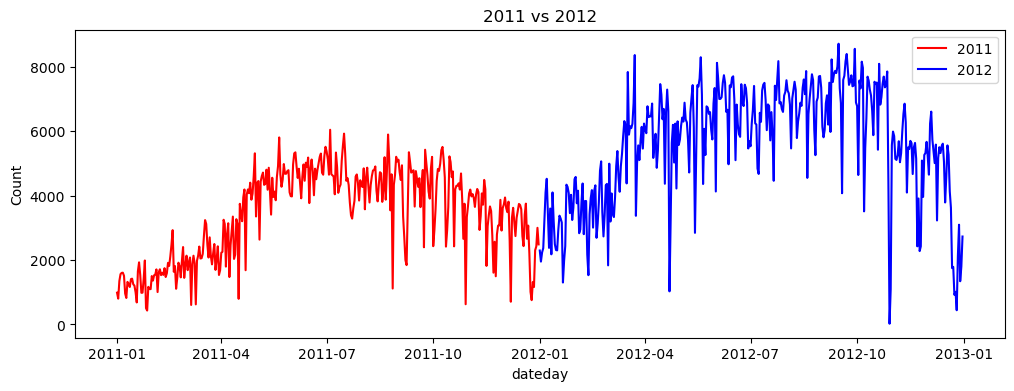

In [171]:
fig, axs = plt.subplots(1, sharey=True, figsize=(12, 4))

valid_inputs = df.columns
wanted_input = input(f"Select one of the following: {', '.join(valid_inputs)}\n")

if wanted_input not in valid_inputs:
    print(f"{wanted_input} is an invalid input. Please try again.")
else:
    print(f"The column you selected: {wanted_input}")
    for idx, c in enumerate(['red', 'blue']):
        x = []
        y = []

        for h in df[df['year'] == idx].groupby(wanted_input):
            x.append(h[0])
            y.append(h[1]['count'].sum())

        axs.plot(x, y, color= c, label = f'{2011+idx}')
        axs.set_title('2011 vs 2012')
        axs.set_xlabel(wanted_input)
        axs.set_ylabel('Count')
        axs.legend()

plt.show()

In [30]:
df[df['year'] == 0].head()

,instant,dateday,season,year,month,day,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,realtemp,realatemp
0,1,2011-07-03,Summer,0,7,3,17,No,0,No,Light,0.80,0.7424,0.49,0.8507,181,177,358,29.60,32.9984
1,2,2011-07-03,Summer,0,7,3,18,No,0,No,Light,0.80,0.7424,0.49,0.8507,74,107,181,29.60,32.9984
2,3,2011-08-27,Summer,0,8,27,17,No,6,No,Light,0.64,0.5758,0.89,0.8358,2,14,16,22.08,22.0028
3,4,2011-02-25,Winter,0,2,25,15,No,5,Yes,Clear,0.46,0.4545,0.41,0.8060,5,50,55,13.62,13.9970
5,6,2011-02-15,Winter,0,2,15,1,No,2,Yes,Clear,0.30,0.2424,0.42,0.7761,0,5,5,6.10,-0.0016


## Making graph def

In [31]:
valid_inputs = df.columns

In [3]:
def paint_old(splitter, catagory):

    fig, axs = plt.subplots(1, sharey=True, figsize=(12, 4))

    #this converts all words in a column into a number
    cat= df[splitter].unique()

    for idx, c in enumerate(cat):
        x = []
        y = []
        for h in df[df[splitter] == cat[idx]].groupby(catagory):
            x.append(h[0])
            y.append(h[1]['count'].sum())
        axs.plot(x, y, label = f'{splitter} {idx}')
        axs.set_title(splitter)
        axs.set_xlabel(catagory)
        axs.set_ylabel('Count')
        if len(cat) < 13:
            axs.legend(cat)
    plt.show()

wanted_input = input(f"Select a Splitter from the following: {', '.join(valid_inputs)}\n")
wanted_input1 = input(f"Select a Catagory from the following: {', '.join(valid_inputs)}\n")

if wanted_input not in valid_inputs:
    print("Invalid input. Please try again.")
elif wanted_input1 not in valid_inputs:
    print("Invalid second input. Please try again.")
else:
    print(f"The Splitter you selected: {wanted_input}")
    print(f"The Column you selected: {wanted_input1}")
    paint_old(wanted_input, wanted_input1)


NameError: name 'valid_inputs' is not defined

In [2]:
def paint(splitter, catagory, combine=True):
    fig, axs = plt.subplots(1, sharey=True, figsize=(10, 4))

    #this converts all words in a column into a number
    cat= df[splitter].unique()

    for idx, c in enumerate(cat):
        x = []
        y = []
        c = []
        r = []
        for h in df[df[splitter] == cat[idx]].groupby(catagory):
            x.append(h[0])
            y.append(h[1]['count'].sum())
            c.append(h[1]['casual'].sum())
            r.append(h[1]['registered'].sum())
        if combine == True:
            axs.plot(x, y, label = f'{splitter} {idx}')
            axs.set_title(f'usage per {catagory}, split per {splitter}' )
            axs.set_xlabel(catagory)
            axs.set_ylabel('Count')
        else:
            axs.plot(x, c, label = f'{splitter} {idx} casual')
            axs2 = axs.twinx()
            axs.plot(x, r, label = f'{splitter} {idx} registered')
            axs.set_title(f'usage per {catagory}, split per {splitter}' )
            axs.set_xlabel(catagory)
            axs.set_ylabel('Count')           
        if len(cat) < 13:
            axs.legend()
    plt.show()

valid_inputs = df.columns
splitter_input = input(f"Select a Splitter from the following: {', '.join(valid_inputs)}\n")
column_input = input(f"Select a Catagory from the following: {', '.join(valid_inputs)}\n")

if splitter_input not in valid_inputs:
    print("Invalid input. Please try again.")
elif column_input not in valid_inputs:
    print("Invalid second input. Please try again.")
else:
    print(f"The Splitter you selected: {splitter_input}")
    print(f"The Column you selected: {column_input}")
    paint(splitter_input, column_input, True)

NameError: name 'df' is not defined

In [1]:
paint('year', 'holiday', False)
#paint('season', 'hour', True)

NameError: name 'paint' is not defined

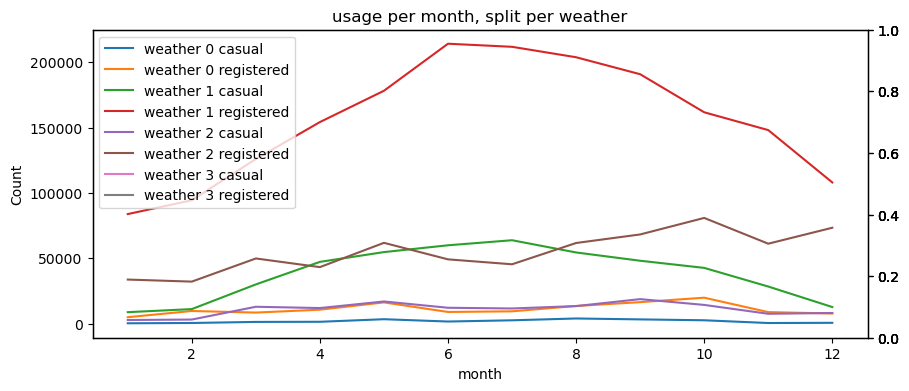

In [248]:
paint('weather', 'month', input('Combine = False || Split = True'))


### Don't Touch

In [36]:
# l_list = df.columns.drop(['dateday', 'instant', 'count', 'temp', 'atemp'])

# for x in l_list:
#     print(x)
#     l_list = list(filter(lambda t: x != t, l_list))
#     print(l_list)

#     for y in l_list:
#         paint(x, y)

# Heat maps

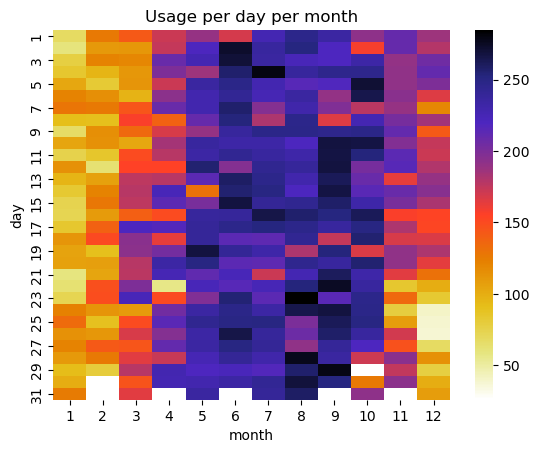

In [93]:
# Create a heat map where you can add the X and Y manually

def heat_manual(index, columns):
    # Data for the heatmap
    pivot_table = df.pivot_table(index=index, columns=columns, values='count')
    
    sns.heatmap(pivot_table, cmap='CMRmap_r')

    #Giving the title
    plt.title(f'Usage per {index} per {columns}')
    
    plt.show()

heat_manual('day', 'month')

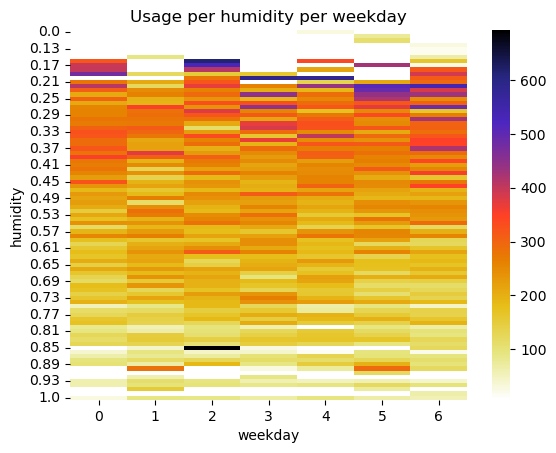

In [132]:
# Create a heat map where you can add the X and Y with an imput

def heat_input():
    x= input(f'Select Y:{valid_inputs}')
    y= input(f'Select X:{valid_inputs}')

    pivot_table = df.pivot_table(index=x, columns=y, values='count')
    
    # Plot the heatmap using seaborn
    sns.heatmap(pivot_table, cmap='CMRmap_r')

    plt.title(f'Usage per {x} per {y}')
    # Display the plot
    plt.show()

heat_input()

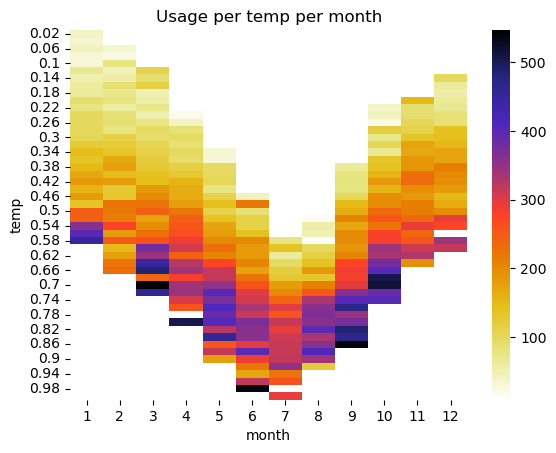

In [90]:
#'temp' 'month'

heat_input()

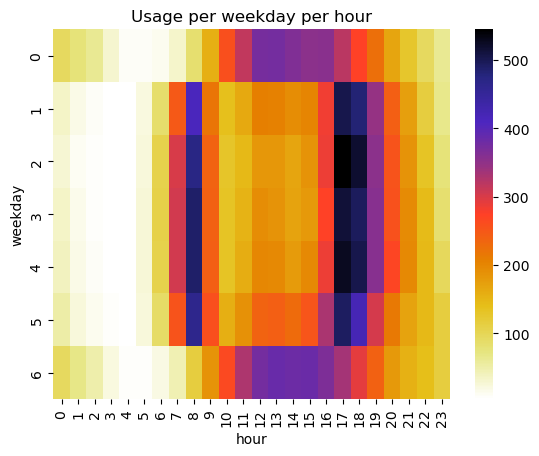

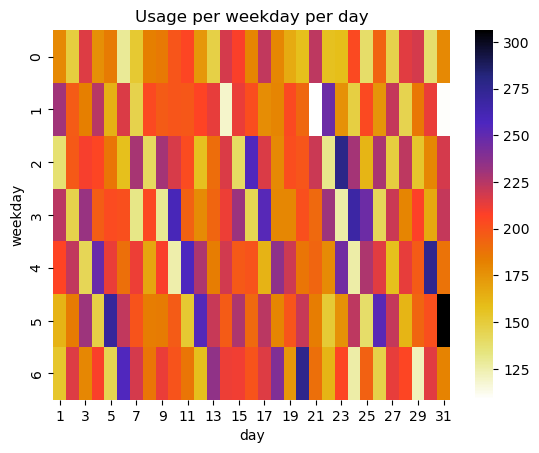

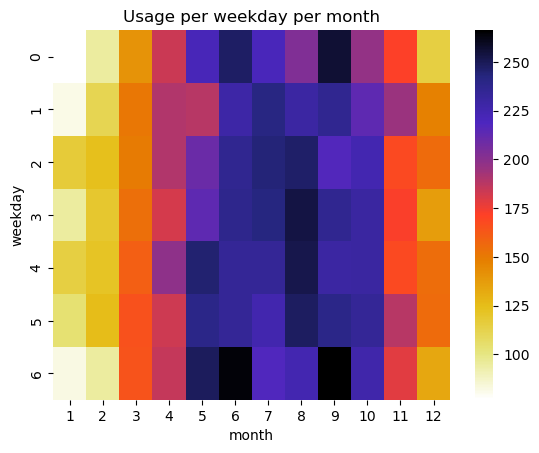

In [133]:
heat_manual('weekday', 'hour')
heat_manual('weekday', 'day')
heat_manual('weekday', 'month')

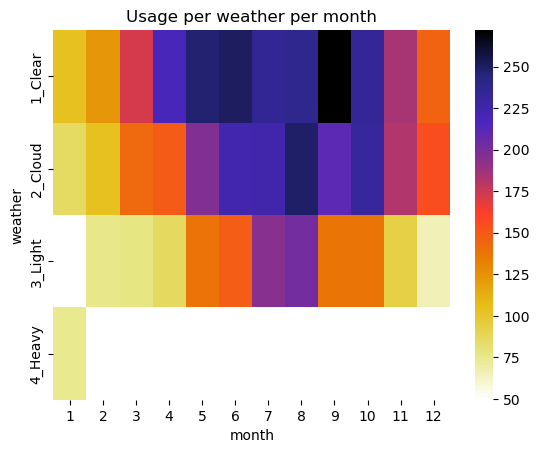

In [117]:
heat_manual('weather', 'month')

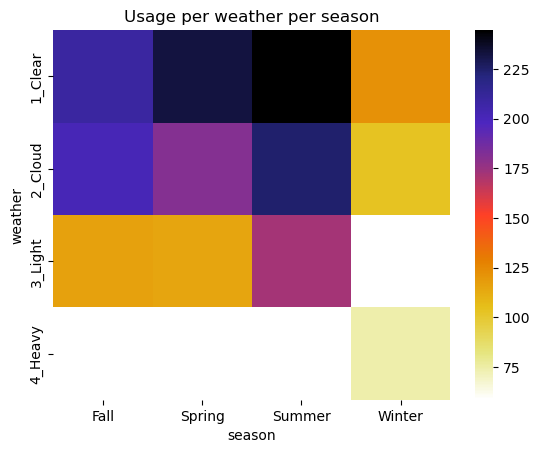

In [118]:
heat_input()

<AxesSubplot:xlabel='holiday', ylabel='count'>

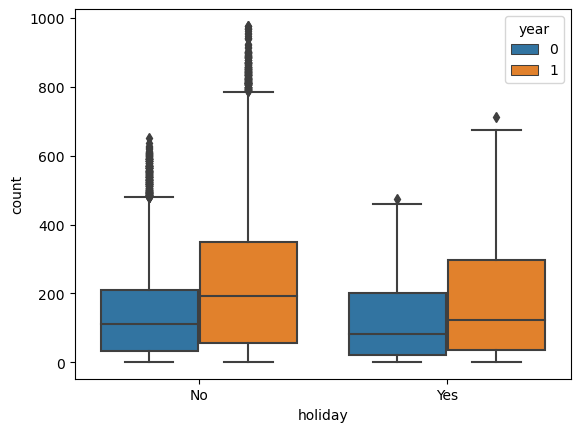

In [271]:
sns.boxplot(data = df, x='holiday', y='count', hue= 'year')

<AxesSubplot:xlabel='season', ylabel='realatemp'>

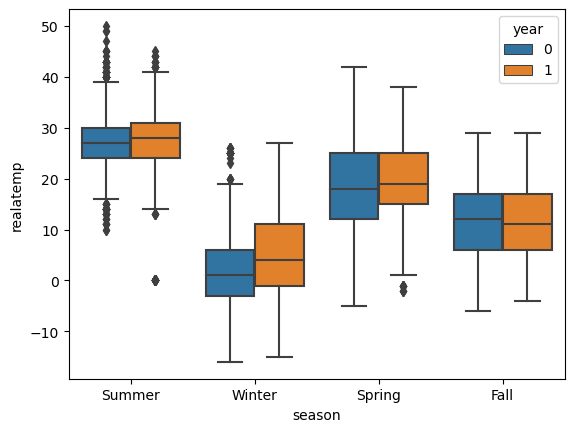

In [167]:
sns.boxplot(data = df, x='season', y='realatemp', hue= 'year')

<AxesSubplot:xlabel='season', ylabel='registered'>

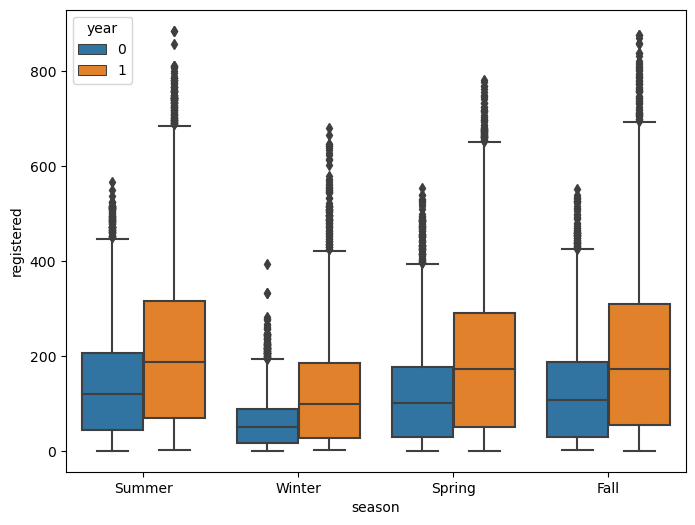

In [270]:
fig, axs = plt.subplots(1, figsize=(8, 6))

sns.boxplot(data = df, x='season', y='registered', hue= 'year')

In [134]:
df.head()

,instant,dateday,season,year,month,day,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,realtemp,realatemp
0,1,2011-07-03,Summer,0,7,3,17,No,0,No,3_Light,0.80,0.7424,0.49,0.8507,181,177,358,29.60,32.9984
1,2,2011-07-03,Summer,0,7,3,18,No,0,No,3_Light,0.80,0.7424,0.49,0.8507,74,107,181,29.60,32.9984
2,3,2011-08-27,Summer,0,8,27,17,No,6,No,3_Light,0.64,0.5758,0.89,0.8358,2,14,16,22.08,22.0028
3,4,2011-02-25,Winter,0,2,25,15,No,5,Yes,1_Clear,0.46,0.4545,0.41,0.8060,5,50,55,13.62,13.9970
4,5,2012-02-24,Winter,1,2,24,21,No,5,Yes,1_Clear,0.42,0.4242,0.35,0.8060,1,151,152,11.74,11.9972


### Observations
'4 am is the least used time.'
January and Febuary have the lowest usage.
Registarted users use most during rush hour and reduce their usage in the weekend.
Causal users you it the most in the afternoon and increase their usage in the weekend.'
More people seem to travel home during rush hour than to work.
The warmest days of each month are the most populair

#### Goal
Findout what the highest (or average) usage on any given day. that will be the base price. Then a discount is given to those people.